# Kaggle Task of MovieLens on Pandas

https://www.kaggle.com/code/harunshimanto/pandas-with-data-science-ai

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv(r'C:\Users\akash\OneDrive\Desktop\FSDS\DataSets\archive\rating.csv')
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39


In [3]:
movies = pd.read_csv(r'C:\Users\akash\OneDrive\Desktop\FSDS\DataSets\archive\movie.csv')
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
tag = pd.read_csv(r'C:\Users\akash\OneDrive\Desktop\FSDS\DataSets\archive\tag.csv')
tag.head(3)


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19


- for current analysis we'll remove timestamp

In [5]:
del ratings['timestamp']
del tag['timestamp']

In [6]:
ratings.head(2)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5


In [7]:
tag.head(2)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero


## Data Structure

### series

In [8]:
row_0 = tag.iloc[0]
type(row_0)

pandas.core.series.Series

In [9]:
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [10]:
row_0.index # gives column/attributes name

Index(['userId', 'movieId', 'tag'], dtype='object')

In [11]:
tag['userId']  # shows only userId attributes

0             18
1             65
2             65
3             65
4             65
           ...  
465559    138446
465560    138446
465561    138446
465562    138446
465563    138472
Name: userId, Length: 465564, dtype: int64

In [12]:
row_0['userId']

np.int64(18)

In [13]:
'rating' in row_0

False

In [14]:
row_0.name

0

In [15]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

## DataFrames 

In [16]:
tag.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [17]:
tag.index

RangeIndex(start=0, stop=465564, step=1)

In [18]:
tag.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [19]:
tag.iloc[[0,11,500]] # from tag data set we filter specific the rows by their index

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


## Descriptive Statistics

In [20]:
ratings['rating'].describe() # here we describe only rating column

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [21]:
ratings.describe() # and here entire data set

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [22]:
ratings['rating'].mean()

np.float64(3.5255285642993797)

In [23]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [24]:
ratings.min()

userId     1.0
movieId    1.0
rating     0.5
dtype: float64

In [25]:
ratings['rating'].min()

0.5

In [26]:
ratings['rating'].max()

5.0

In [27]:
ratings['rating'].std()

1.051988919275684

In [28]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [29]:
ratings.corr() # co-relation

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [30]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


np.False_

In [34]:
filter2 = ratings['rating'] > 0
filter2.all()

np.True_

## Data Cleaning: Handling Missing Data

In [36]:
movies.shape # shows no. of rows & columns

(27278, 3)

In [37]:
movies.isnull().any().any() # isnull() checks for missing data(NaN,None, NaT)

np.False_

- That's nice no null values

In [38]:
ratings.shape

(20000263, 3)

In [39]:
ratings.isnull().any().any() # here alse no null values

np.False_

In [40]:
tag.shape

(465564, 3)

In [41]:
tag.isnull().any().any() # There is null values 

np.True_

In [42]:
 tag=tag.dropna() # will remove all null or None values 

In [43]:
tag.isnull().any().any() # now There is no any null value

np.False_

In [44]:
tag.shape

(465548, 3)

- That's nice, No null values ! Notice the no. of line have reduced

## Data Visualization

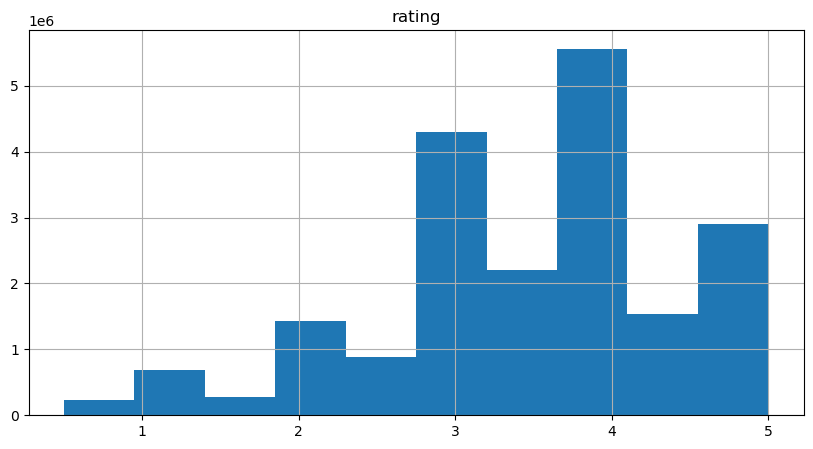

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline   
                       
ratings.hist(column = 'rating', figsize=(10, 5))
plt.show()

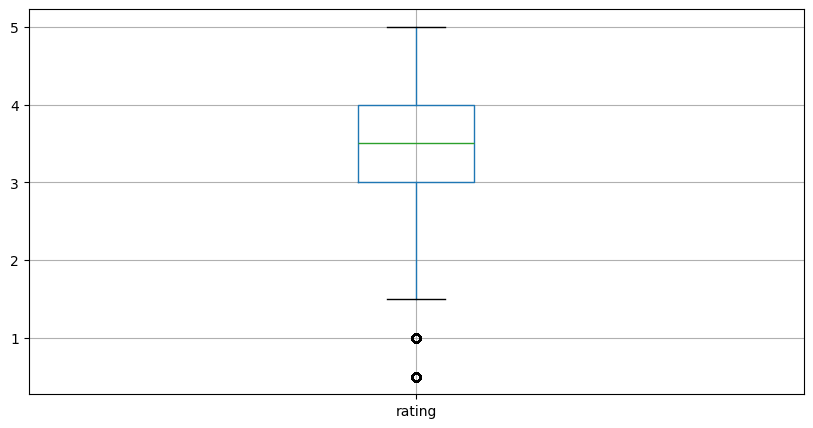

In [47]:
ratings.boxplot(column = 'rating', figsize=(10, 5))
plt.show()

## Slicing Out Columns

In [48]:
tag['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [50]:
movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [51]:
ratings[-10:] # from button -10 rows to last row

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [52]:
tag_counts = tag['tag'].value_counts() 
tag_counts[-10:]  
# value_counts() counts how many times each unique value appears in a Series/column

tag
chiptunes         1
ewan macgregor    1
Disguises         1
retarted          1
operatic          1
heartrending      1
film crew         1
es                1
girltalk          1
Spanish films     1
Name: count, dtype: int64

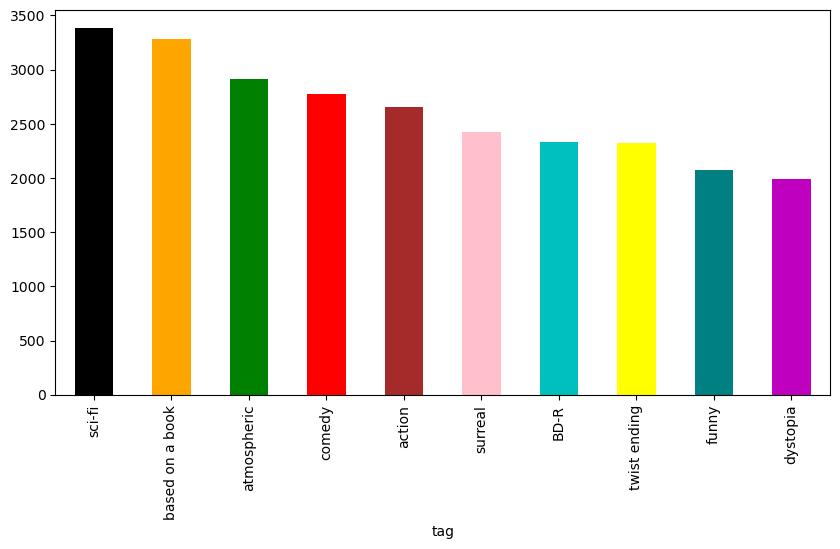

In [53]:
tag_counts[:10].plot(kind='bar', figsize=(10,5),
color = ['k','orange', 'green', 'red', 'brown', 'pink', 'c', 'yellow', 'teal', 'm']
)
plt.show()

## Filter for Selecting Rows

In [54]:
is_highly_related = ratings['rating'] >= 5.0
ratings[is_highly_related][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [55]:
is_action = movies['genres'].str.contains('Action')
movies[is_action][5:15]

# str.contains('Action') it checks only for Action in 'genres' column

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [56]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


In [65]:
is_scifi = movies['genres'].str.contains('Sci-Fi')
movies[is_scifi][:4]

,movieId,title,genres
23,24,Powder (1995),Drama|Sci-Fi
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


In [68]:
movies[is_scifi][110:150] # last 5 rows

,movieId,title,genres
1798,1882,Godzilla (1998),Action|Sci-Fi|Thriller
1825,1909,"X-Files: Fight the Future, The (1998)",Action|Crime|Mystery|Sci-Fi|Thriller
1833,1917,Armageddon (1998),Action|Romance|Sci-Fi|Thriller
1837,1921,Pi (1998),Drama|Sci-Fi|Thriller
1840,1924,Plan 9 from Outer Space (1959),Horror|Sci-Fi
1881,1965,Repo Man (1984),Comedy|Sci-Fi
1925,2009,Soylent Green (1973),Drama|Mystery|Sci-Fi|Thriller
1926,2010,Metropolis (1927),Drama|Sci-Fi
1927,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
1928,2012,Back to the Future Part III (1990),Adventure|Comedy|Sci-Fi|Western


## Group By and Aggregate

In [58]:
ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()
ratings_count
# it group movieId and ratings on basis of rating means same ratings movieId will group
# count() shows the frequency

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [59]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()
average_rating

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
...,...
131254,4.000000
131256,4.000000
131258,2.500000


In [60]:
ratings.head(2)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5


In [62]:
minimum_rating = ratings[['movieId', 'rating']].groupby('rating').min()
minimum_rating

,movieId
rating,
0.5,1
1.0,1
1.5,1
2.0,1
2.5,1
3.0,1
3.5,1
4.0,1
4.5,1


In [63]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [82]:
genres_count = movies[['movieId', 'genres']].groupby('genres').count()
genres_count

,movieId
genres,
(no genres listed),246
Action,178
Action|Adventure,86
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,8
...,...
Thriller|War,9
Thriller|Western,2
War,32


In [85]:
genres_count[45:55]

,movieId
genres,
Action|Adventure|Children|Drama,1
Action|Adventure|Children|Fantasy,6
Action|Adventure|Children|Fantasy|Mystery|Thriller,1
Action|Adventure|Children|IMAX,2
Action|Adventure|Comedy,40
Action|Adventure|Comedy|Crime,11
Action|Adventure|Comedy|Crime|Drama,1
Action|Adventure|Comedy|Crime|Drama|Film-Noir|Horror|Mystery|Thriller|Western,1
Action|Adventure|Comedy|Crime|Drama|Thriller,1


In [84]:
movie_count = ratings[['movieId', 'rating']].groupby('movieId').count()
movie_count.head(10)

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
6,23899
7,12961
8,1415
9,3960


In [86]:
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


## Merge DataFrame

In [87]:
tag.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [88]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [90]:
t = movies.merge(tag, on = 'movieId', how = 'inner')
t.head()
# merges movies and tag dataFrame inner(common) based on movieId
# shows those rows whose movieId matched

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


**Combine aggregation, merging, and filters to get useful analytics**

In [22]:
avg_rating = ratings.groupby('movieId', as_index=False).mean()
avg_rating.head()

,movieId,userId,rating
0,1,69282.396821,3.921240
1,2,69169.928202,3.211977
2,3,69072.079388,3.151040
3,4,69652.913280,2.861393
4,5,69113.475454,3.064592


In [23]:
# now after deleting userId
del avg_rating['userId']
avg_rating.head()


,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [24]:
box_office = movies.merge(avg_rating, on='movieId', how = 'inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [26]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [27]:
is_highly_rated[-5:]

26739     True
26740     True
26741    False
26742    False
26743     True
Name: rating, dtype: bool

In [32]:
super_highly_rated = box_office[box_office['rating'] >= 5.0] 

,movieId,title,genres,rating
9005,26718,Life On A String (Bian chang Bian Zou) (1991),Adventure|Drama|Fantasy|Musical,5.0
9557,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary,5.0
9857,32230,"Snow Queen, The (Lumikuningatar) (1986)",Children|Fantasy,5.0
10558,40404,Al otro lado (2004),Drama,5.0
12005,54326,"Sierra, La (2005)",Documentary,5.0
...,...,...,...,...
26557,130347,Bill Hicks: Sane Man (1989),Comedy,5.0
26559,130351,The Wrecking Crew (2008),Documentary,5.0
26621,130644,The Garden of Sinners - Chapter 5: Paradox Par...,Animation,5.0
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0


In [35]:
is_adveture = box_office['genres'].str.contains('Adventure')
box_office[is_adveture][:5] # we can use head() instead of it

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [36]:
box_office[is_adveture].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [37]:
box_office[is_adveture & is_highly_rated][-5:] # shows adventure with highly rated movie

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [38]:
is_SciFi = box_office['genres'].str.contains('Sci-Fi')
box_office[is_SciFi].head()

,movieId,title,genres,rating
23,24,Powder (1995),Drama|Sci-Fi,3.199849
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,3.952230
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.898055
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,2.144243
75,76,Screamers (1995),Action|Sci-Fi|Thriller,3.009024


In [41]:
# show me the movie title SciFi with Highly rated

box_office[is_SciFi & is_highly_rated].tail(10)

,movieId,title,genres,rating
25558,124507,Journey to the Center of the Earth (1989),Action|Children|Fantasy|Sci-Fi,4.000
25587,124851,Delirium (2014),Adventure|Romance|Sci-Fi,4.000
25865,126432,Visitor to a Museum (Posetitel muzeya) (1989),Sci-Fi,4.500
25885,126591,The Humanoid (1979),Fantasy|Sci-Fi,4.000
25889,126723,Kenny Begins (2009),Action|Comedy|Sci-Fi,4.000
25955,126983,City Zero (1989),Comedy|Drama|Sci-Fi,4.000
26155,128324,Lunopolis (2009),Sci-Fi,4.250
26320,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi,4.375
26601,130518,The Amazing Screw-On Head (2006),Action|Adventure|Animation|Comedy|Sci-Fi,4.000
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.000


## Vectoreized String operation

In [42]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## split 'genres' into multiple columns

In [47]:
movies_genres = movies['genres'].str.split('|', expand= True)
#It takes the genres column and splits the text wherever “|” appears.
#Each genre is then placed into its own separate column.

In [48]:
movies_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


## Adda new column for comeddy genres flag

In [51]:
movies_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movies_genres[:10]
# adds new column 'isComedy' to easily identify comedy genres present in rows

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


## Extract Year Title e.g. (2007)

In [52]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [53]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


## Parsing Timestamps
- Timestamps are common in sensor data or other time series datasets. Let us revisit the tags.csv dataset and read the timestamps

In [61]:
tags = pd.read_csv(r'C:\Users\akash\OneDrive\Desktop\FSDS\DataSets\archive\tag.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [76]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

***Unix time / POSIX time / epoch time records time in seconds
since midnight Coordinated Universal Time (UTC) of April 4, 2009***

In [78]:
# tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s') -- not work 
# my timestamp is already human readable formate
tags['parsed_time'] = pd.to_datetime(tags['timestamp']) # so used this just to check

- Data Type datetime64[ns] maps to either

In [79]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

###### Selecting rows based on timestamps

In [81]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]
tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

### Sorting the table using the timestamps

In [82]:
tags.sort_values(by= 'parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,2005-12-24 13:00:10,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19,2005-12-24 13:03:19
333922,100371,47,morgan freeman,2005-12-24 13:03:32,2005-12-24 13:03:32
333921,100371,47,brad pitt,2005-12-24 13:03:32,2005-12-24 13:03:32
333936,100371,4011,brad pitt,2005-12-24 13:03:51,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,2005-12-24 13:03:51,2005-12-24 13:03:51
333920,100371,32,bruce willis,2005-12-24 13:04:02,2005-12-24 13:04:02


### 📇 Average Movie Ratings over Time
#### Movie rating to year of launch

In [69]:
avg_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
avg_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [75]:
joined = movies.merge(avg_rating, on='movieId', how='inner')
joined.head()
#joined.corr()-- this will not work
#joined.select_dtypes(include='number').corr() -- this works
joined.corr(numeric_only=True)

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000
